In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# transformers to impute missing data with sklearn:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# We use only the following variables for the demo

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [3]:
# let's load the House Prices dataset

data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [5]:
# let's check the misssing data

X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [6]:
# Set up the simple imputer to impute with the median.

imputer = SimpleImputer(strategy="median")

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.

imputer.fit(X_train)

SimpleImputer(strategy='median')

In [7]:
# We can look at the learnt medians like this:

imputer.statistics_

array([  69. ,    6. ,    0. ,  486.5,  992. , 1095. , 1479. , 1979. ,
          0. ])

In [8]:
# And we can investigate the medians directly to corroborate
# the imputer did a good job:

X_train.median()

LotFrontage      69.0
OverallQual       6.0
MasVnrArea        0.0
BsmtUnfSF       486.5
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
GarageYrBlt    1979.0
WoodDeckSF        0.0
dtype: float64

In [9]:
# Now we impute the train and test sets.

# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[  69.,    7.,  573., ..., 2034., 1998.,  576.],
       [  69.,    6.,    0., ..., 1291., 1996.,  307.],
       [  50.,    5.,    0., ...,  858., 1979.,  117.],
       ...,
       [  68.,    6.,    0., ..., 1902., 1978.,    0.],
       [  69.,    7.,   18., ..., 1557., 2003.,  143.],
       [  58.,    7.,   30., ..., 1839., 1998.,    0.]])

In [10]:
# If we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # the variable names
)

X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
0,69.0,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.0,576.0
1,69.0,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.0,307.0
2,50.0,5.0,0.0,162.0,858.0,858.0,858.0,1979.0,117.0
3,60.0,6.0,0.0,356.0,560.0,698.0,1258.0,1939.0,0.0
4,60.0,2.0,0.0,0.0,290.0,438.0,438.0,1930.0,0.0


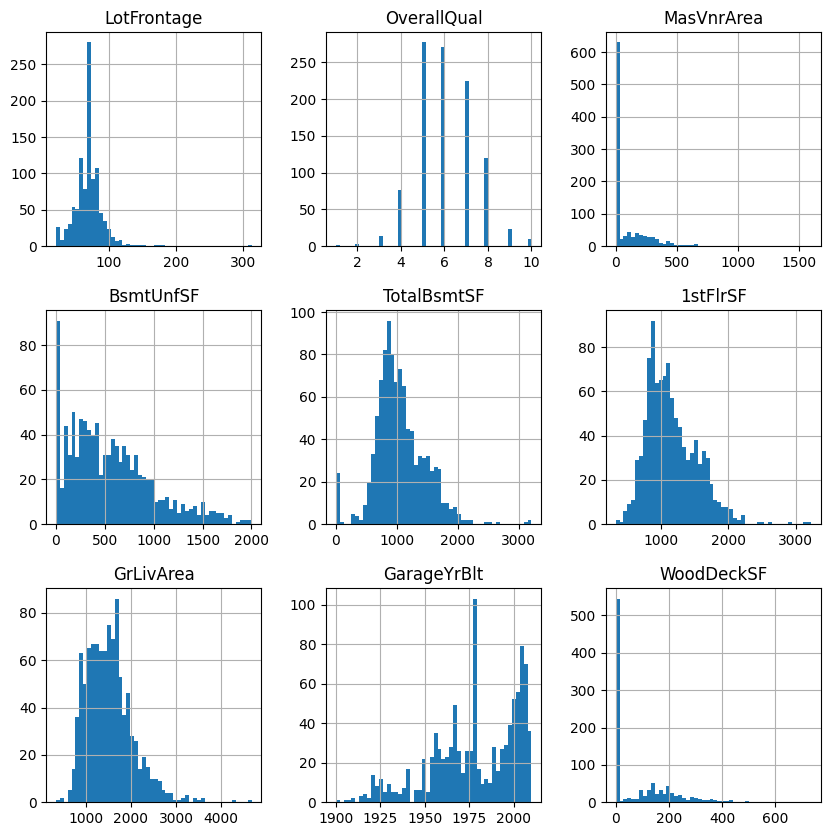

In [11]:
# Let's explore the change in the distributions after the median imputation

X_train.hist(bins=50, figsize=(10, 10))
plt.show()

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [13]:
# set up the imputer

imputer = SimpleImputer(strategy="mean").set_output(transform="pandas")

In [14]:
# We fit the imputer to the train set.

imputer.fit(X_train)

SimpleImputer()

In [15]:
# the learn mean values:

imputer.statistics_

array([  69.66866747,    6.07925636,  103.55358899,  565.99217221,
       1055.34344423, 1161.7221135 , 1522.13796477, 1978.01239669,
         94.85225049])

In [16]:
# impute missing data

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# the resulting dataframe
X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
64,69.668667,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.000000,576.0
682,69.668667,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.000000,307.0
960,50.000000,5.0,0.0,162.0,858.0,858.0,858.0,1978.012397,117.0
1384,60.000000,6.0,0.0,356.0,560.0,698.0,1258.0,1939.000000,0.0
1100,60.000000,2.0,0.0,0.0,290.0,438.0,438.0,1930.000000,0.0


In [17]:
# check missing values

X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [18]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [19]:
imputer = ColumnTransformer(
    transformers=[
        ("mean_imputer", SimpleImputer(strategy="mean"), ["LotFrontage"]),
        (
            "median_imputer",
            SimpleImputer(strategy="median"),
            ["MasVnrArea", "GarageYrBlt"],
        ),
    ],
    remainder="passthrough",
)

# We need to add remainder = True to indicate that what we want
# ALL the columns returned at the end of the transformation


In [20]:
# set output to be a dataframe

imputer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [21]:
# Now we fit the preprocessor:

imputer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [22]:
# We can explore the imputers like this:

imputer.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [23]:
# And we can look at the parameters learned
# by the imputers like this:

# for the mean imputer:
imputer.named_transformers_["mean_imputer"].statistics_

array([69.66866747])

In [24]:
# The median imputer learned 2 median values
# because we wanted to impute 2 different variables.

imputer.named_transformers_["median_imputer"].statistics_

array([   0., 1979.])

In [25]:
# and now we can impute the data

X_train = imputer.transform(X_train)

# check resulting dataframe
X_train.head()

,mean_imputer__LotFrontage,median_imputer__MasVnrArea,median_imputer__GarageYrBlt,remainder__OverallQual,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__GrLivArea,remainder__WoodDeckSF
64,69.668667,573.0,1998.0,7,318,1057,1057,2034,576
682,69.668667,0.0,1996.0,6,288,1291,1291,1291,307
960,50.000000,0.0,1979.0,5,162,858,858,858,117
1384,60.000000,0.0,1939.0,6,356,560,698,1258,0
1100,60.000000,0.0,1930.0,2,0,290,438,438,0


In [26]:
# and now we can impute the test set
X_test = imputer.transform(X_test)

# check resulting test set
X_test.head()

,mean_imputer__LotFrontage,median_imputer__MasVnrArea,median_imputer__GarageYrBlt,remainder__OverallQual,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__GrLivArea,remainder__WoodDeckSF
529,69.668667,0.0,1975.0,6,816,2035,2515,2515,0
491,79.000000,0.0,1941.0,6,238,806,958,1578,0
459,69.668667,161.0,1950.0,5,524,709,979,1203,0
279,83.000000,299.0,1977.0,7,768,1160,1156,2022,288
655,21.000000,381.0,1971.0,6,525,525,525,1092,0


In [27]:
X_test.isnull().sum()

mean_imputer__LotFrontage      0
median_imputer__MasVnrArea     0
median_imputer__GarageYrBlt    0
remainder__OverallQual         0
remainder__BsmtUnfSF           0
remainder__TotalBsmtSF         0
remainder__1stFlrSF            0
remainder__GrLivArea           0
remainder__WoodDeckSF          0
dtype: int64